<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуем корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Импорт необходимых библиотек:**

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## Загрузка данных

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


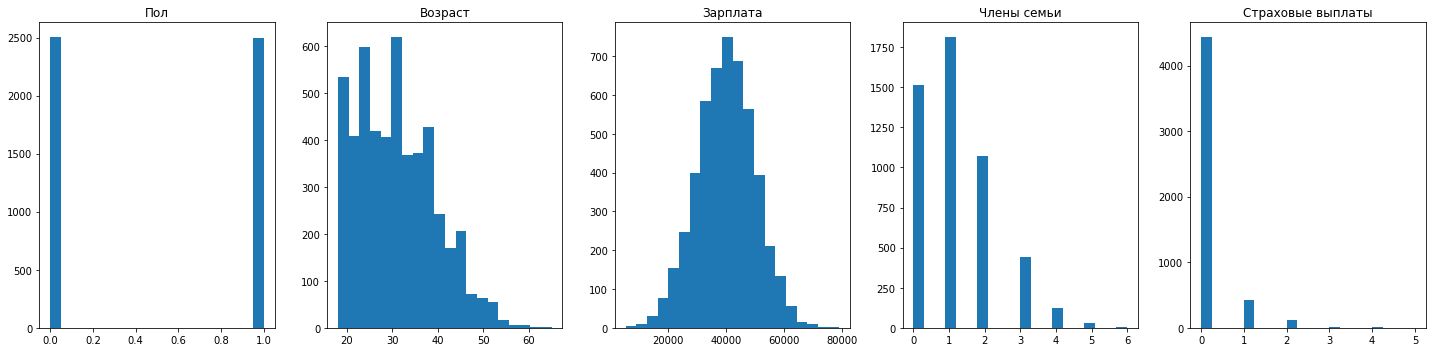

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=len(data.columns), figsize=(20, 5))  
bins = 20  


for i, col in enumerate(data.columns):
    axs[i].hist(data[col], bins=bins)
    axs[i].set_title(col)  

plt.tight_layout()  
plt.show()

**Разделим данные обучающую (тренировочную) выборку и на целевой признак:**

In [6]:
features=data.drop(['Страховые выплаты'],axis=1)
target=data['Страховые выплаты']

train_features, test_features, train_target, test_target = train_test_split(features,target, test_size=0.2, 
                                                                            random_state=12345)

In [7]:
print('Размер тестовой выборки:', test_features.shape[0])
print('Размер тренировочной выборки:', train_features.shape[0])

Размер тестовой выборки: 1000
Размер тренировочной выборки: 4000


## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Создадим модель линейной регрессии, обучим ее на исходных данных и получим предсказания:**

In [8]:
model_l = LinearRegression()
model_l.fit(train_features,train_target)
predictions= model_l.predict(test_features)

print('R2_score:', r2_score(test_target, predictions))
print('MSE:', mean_squared_error(predictions,test_target))

R2_score: 0.41176839567705226
MSE: 0.11005813316882353


In [9]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print('R2_score:', r2_score(target, predictions))
print('MSE:', mean_squared_error(predictions,target))

R2_score: 0.42494550286668
MSE: 0.1233468894171086


**Умножим признаки на обратимую матрицу. Выясним изменится ли качество линейной регрессии? Если не изменится, то укажем, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.**

In [10]:
matrix=np.random.normal(3, size=(4,4))
print(matrix)

[[3.87754726 3.64525716 2.53494911 1.55210113]
 [3.72141707 3.66909559 2.81685958 2.40536603]
 [2.74947696 0.59399986 3.864247   4.10488338]
 [2.61152455 3.68933866 4.73523175 2.20480692]]


Матрицы, для которых можно найти обратные, называются обратимыми. Проверим на обратимость нашу матрицу:

In [11]:
print(np.linalg.inv(matrix))

[[ 1.10318017 -0.86705023  0.23343935 -0.26529096]
 [-0.78903432  1.001693   -0.34797026  0.1104859 ]
 [ 0.52918585 -0.89940609  0.13939749  0.34916456]
 [-1.12290329  1.28248623  0.00638065 -0.16699021]]


Перейдем к умножению признаков: 

In [12]:
train_matrix=train_features @ matrix
train_matrix.columns = train_features.columns
train_matrix.head()

,Пол,Возраст,Зарплата,Члены семьи
317,109508.834511,23721.954883,153862.838346,163426.875550
4143,94184.846358,20465.204178,132272.456810,140484.778417
4252,139847.382551,30347.636614,196437.776578,208640.074200
710,107613.971973,23335.507748,151180.400321,160572.700110
148,107336.412752,23272.418424,150789.240389,160160.006965


In [13]:
test_matrix = test_features @ matrix
test_matrix.columns = test_features.columns
test_matrix.head()

,Пол,Возраст,Зарплата,Члены семьи
3183,107362.854411,23301.831918,150817.530382,160178.648216
1071,118693.751000,25792.227278,166699.359241,177045.151692
2640,115901.992948,25154.133949,162797.191269,172910.951771
2282,95756.226647,20744.576923,134532.132871,142898.049024
1595,110142.102711,23925.184539,154704.312261,164302.774526


In [14]:
model_l = LinearRegression()
model_l.fit(train_matrix,train_target)
predictions_matrix = model_l.predict(test_matrix)

print('R2_score:', r2_score(test_target, predictions_matrix))
print('MSE:', mean_squared_error(predictions_matrix,test_target))

R2_score: 0.41176834576438603
MSE: 0.11005814250748339


Когда мы умножаем признаки на обратимую матрицу, мы производим линейное преобразование признаков. Почему же качество линейной регрессии не изменяется в этом случае:

Обратимость матрицы: Поскольку мы используем обратимую матрицу, мы не теряем информации. Обратимая матрица сохраняет линейную независимость признаков, что означает, что они по-прежнему содержат всю информацию о зависимости между признаками и целевой переменной.

Качество модели: Качество линейной регрессии измеряется с использованием какой-то метрики, например, среднеквадратичной ошибки (MSE) или коэффициента детерминации (R^2). После умножения признаков на обратимую матрицу, модель все еще может адекватно описывать зависимости в данных и делать точные прогнозы, что не отражается на изменении метрики качества.

Параметры модели: Когда мы умножаем матрицу признаков на обратимую матрицу, параметры модели также изменяются, но они изменяются таким образом, что компенсируются изменениями в признаках, сохраняя ту же функциональную форму модели. Поэтому, несмотря на изменения в параметрах, модель сохраняет способность описывать данные.

Связь параметров: Параметры линейной регрессии в исходной и преобразованной задачах связаны через обратимую матрицу. Если исходные параметры модели были вектором β, а обратимая матрица - это М, то параметры модели после преобразования будут равны Mβ. Таким образом, параметры модели в новой задаче просто представляют собой линейную комбинацию исходных параметров.

В итоге, качество линейной регрессии не изменяется, потому что сохраняется линейная независимость признаков, несмотря на изменение их представления, и параметры модели адаптируются так, чтобы сохранить ее адекватность.

**Обоснование:**

Используемые свойства:
$$
(AB)^T=B^T A^T
$$
$$
(AB)^{-1} = B^{-1} A^{-1}
$$
$$
A A^{-1} = A^{-1} A = E
$$
$$
AE = EA = A
$$
Доказательство:
$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$
\
Требуется доказать, что предсказания не изменятся, имеем  $a =  Xw$,   $a' = X'w'$
\
\
$$
    w = (X^T X)^{-1} X^T y
$$
\
$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} E X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} X^T y
$$

Так как  $w = (X^T X)^{-1} X^T y$

$$
w' = P^{-1}w
$$



Мы доказали, что $w' = P^{-1}w$, это означает, что $a=a'$ и предсказания не изменились.

## Алгоритм преобразования

**Алгоритм**

- Создаём рандомную матрицу SECRET

- Проверяем её на обратимость

- Создаём новую матрицу данных 

- Ищем метрики качества 

- Описываем вывод полученных результатов

**Обоснование**

Как я уже писал выше, когда мы умножаем матрицу признаков на обратимую матрицу, параметры модели также изменяются, но они изменяются таким образом, что компенсируются изменениями в признаках, сохраняя ту же функциональную форму модели. Поэтому, несмотря на изменения в параметрах, модель сохраняет способность описывать данные.

## Проверка алгоритма

**Создаём рандомную матрицу SECRET:**

In [15]:
SECRET = np.random.normal(3, size=(4,4))
print(SECRET)

[[1.16204936 2.33102273 2.58155995 4.65475173]
 [2.58143062 2.9092984  3.57521863 4.76493129]
 [3.18218004 1.75931315 3.96500649 4.62448083]
 [3.77641382 4.82568507 2.91863137 3.10894326]]


**Проверяем её на обратимость:**

In [16]:
print(np.linalg.inv(SECRET))

[[ 1.54570848 -3.81780128  1.76514474  0.91149736]
 [-0.47670561  1.29588921 -0.82700773 -0.04226368]
 [-3.13734595  6.04365446 -2.1706598  -1.33674269]
 [ 1.80767294 -3.04770927  1.17735107  0.53497892]]


**Создаём новую матрицу данных:**

In [17]:
train_SECRET = train_features @ SECRET
train_SECRET.columns = train_features.columns
train_SECRET.head()

,Пол,Возраст,Зарплата,Члены семьи
317,126709.947039,70088.500698,157884.600125,184155.853445
4143,108934.976648,60287.212680,135748.812424,158352.496302
4252,161775.848882,89511.183143,201588.714961,235145.811638
710,124503.072456,68880.255881,155137.697327,180956.836316
148,124181.078038,68699.498880,154738.278046,180491.279290


In [18]:
test_SECRET = test_features @ SECRET
test_SECRET.columns = test_features.columns
test_SECRET.head()

,Пол,Возраст,Зарплата,Члены семьи
3183,124205.314433,68728.522428,154764.910034,180524.430776
1071,137288.584090,75981.513044,171076.378116,199559.588114
2640,134071.617535,74182.877265,167068.788513,194881.129908
2282,110791.494010,61282.283579,138053.730388,161027.231421
1595,127408.145918,70511.109965,158758.518277,185187.031054


**Ищем метрики качества:**

In [19]:
X = np.concatenate((np.ones((train_SECRET.shape[0], 1)), train_SECRET), axis=1)
y = train_target
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
predictions_SECRET = test_SECRET @ (w[1:]) + w[0]

In [20]:
print('R2_score:', r2_score(test_target, predictions_SECRET))
print('MSE:', mean_squared_error(predictions_SECRET,test_target))

R2_score: 0.41176760953491864
MSE: 0.11005828025601674


**Проверили и убедились, что качество линейной регрессии не отличается до и после преобразования.**

## Вывод 

- Загрузили и изучили данные.
- Ответили на вопрос про то,  что признаки умножают на обратимую матрицу: Изменится ли качество линейной регрессии?И обосновали решение. 
- Указали, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
- Предложили алгоритм преобразования данных для решения задачи. Обосновали, почему качество линейной регрессии не поменяется.
- Запрограммировали этот алгоритм, применив матричные операции. Проверили, что качество линейной регрессии не отличается до и после преобразования.
- Данные клиентов страховой компании «Хоть потоп» успешно защищены. 